In [152]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'

!wget $data

--2024-11-02 22:43:42--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv.1’

CreditScoring.csv.1 100%[===================>] 178.21K  --.-KB/s    in 0.05s   

2024-11-02 22:43:42 (3.51 MB/s) - ‘CreditScoring.csv.1’ saved [182489/182489]



In [153]:
!head CreditScoring.csv

"Status","Seniority","Home","Time","Age","Marital","Records","Job","Expenses","Income","Assets","Debt","Amount","Price"
1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
1,0,1,36,26,1,1,1,46,107,0,0,310,910
1,1,2,60,36,2,1,1,75,214,3500,0,650,1645
1,29,2,60,44,2,1,1,75,125,10000,0,1600,1800
1,9,5,12,27,1,1,1,35,80,0,0,200,1093
1,0,2,60,32,2,1,3,90,107,15000,0,1200,1957


In [154]:
import pandas as pd
import numpy as np


In [155]:
df = pd.read_csv(data)
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [156]:
df.columns = df.columns.str.lower()

In [157]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [158]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [159]:
# check the R code for mapping.. categorical vals to understable ones.

status_dict = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_dict)

In [160]:
df.status

0            ok
1            ok
2       default
3            ok
4            ok
         ...   
4450    default
4451         ok
4452    default
4453         ok
4454         ok
Name: status, Length: 4455, dtype: object

In [161]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)


In [162]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [163]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [164]:
df.income.max()

np.int64(99999999)

In [165]:
df.income.replace(to_replace=99999999, value=np.nan)

0       129.0
1       131.0
2       200.0
3       182.0
4       107.0
        ...  
4450     92.0
4451     75.0
4452     90.0
4453    140.0
4454    140.0
Name: income, Length: 4455, dtype: float64

In [166]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [167]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [168]:
df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [169]:
df = df[df['status'] != 'unk'].reset_index(drop=True)

In [171]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4454.000000,4454.000000,4454.000000,4454.000000,4420.000000,4407.000000,4436.000000,4454.000000,4454.000000
mean,7.986753,46.438707,37.080377,55.573417,130.564253,5403.979351,343.025924,1038.918276,1462.780198
std,8.174306,14.655462,10.984598,19.515634,86.376808,11574.418141,1245.991541,474.545999,628.128120
min,0.000000,6.000000,18.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1117.250000
50%,5.000000,48.000000,36.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,165.000000,6000.000000,0.000000,1300.000000,1691.500000
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000


In [172]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [173]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [174]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [175]:
del df_train['status']
del df_val['status']
del df_test['status']

In [176]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


# 6.3 Decision trees

In [177]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [178]:
xi = df_train.iloc[0].to_dict()
xi

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [179]:
assess_risk(xi)

'ok'

### Vectorize and Train

In [180]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [181]:
train_dicts = df_train.fillna(0).to_dict(orient='records')
train_dicts[:2]

[{'seniority': 10,
  'home': 'owner',
  'time': 36,
  'age': 36,
  'marital': 'married',
  'records': 'no',
  'job': 'freelance',
  'expenses': 75,
  'income': 0.0,
  'assets': 10000.0,
  'debt': 0.0,
  'amount': 1000,
  'price': 1400},
 {'seniority': 6,
  'home': 'parents',
  'time': 48,
  'age': 32,
  'marital': 'single',
  'records': 'yes',
  'job': 'fixed',
  'expenses': 35,
  'income': 85.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1100,
  'price': 1330}]

In [135]:
df_train.assets[df_train.assets == 0]

1       0.0
2       0.0
3       0.0
5       0.0
6       0.0
       ... 
2661    0.0
2662    0.0
2665    0.0
2666    0.0
2669    0.0
Name: assets, Length: 977, dtype: float64

In [182]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [183]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [184]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

### Validate


In [185]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [186]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.6638583468552468)

In [187]:
# Lets check the auc score on training dataset.
train_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, train_pred)

np.float64(1.0)

In [189]:
# >>> Overfitting

## >> due to unrestricted tree depth

In [203]:
def evaluate_w_depth(depth=3):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)

    train_pred = model.predict_proba(X_train)[:, 1]
    tr_auc = roc_auc_score(y_train, train_pred)

    y_pred = model.predict_proba(X_val)[:, 1]
    val_auc = roc_auc_score(y_val, y_pred)

    print(f"Train AUC: {tr_auc}; Val AUC:{val_auc}")
    print(export_text(model, feature_names=dv.get_feature_names_out()))

In [206]:
evaluate_w_depth(1) # decision stump

Train AUC: 0.6282660131823559; Val AUC:0.6058644740984719
|--- records=yes <= 0.50
|   |--- class: 0
|--- records=yes >  0.50
|   |--- class: 1



In [207]:
evaluate_w_depth(2) 

Train AUC: 0.7054989859726213; Val AUC:0.6685264343319367
|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0



In [208]:
evaluate_w_depth(3)

Train AUC: 0.7761016984958594; Val AUC:0.7389079944782155
|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0



# 6.4 Decision Tree Learning Algo

In [210]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [211]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
4,5000,ok
3,5000,ok
0,8000,default
6,9000,ok


In [221]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [222]:
from IPython.display import display

for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]

    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))

    print()

0


,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64



In [220]:
# misclassification rate => impurity 

In [223]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [ ]:
thresholds = {
    'assets': []
}

Ts = [500, 1000, 2000]



```
### Decision Tree algo:

- Find the Best Split
- Stop if max_depth is reached
- if left is sufficiently large and not pure
    - repeat for left
- if right is sufficiently large and not pure
    - repeat for right

```

# 6.5 Decision Trees Parameter tuning

In [254]:
for d in [1, 2, 3, 4, 5, 6, 7, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print(f"{d} -> {auc:.3f}")

1 -> 0.606
2 -> 0.669
3 -> 0.739
4 -> 0.761
5 -> 0.767
6 -> 0.760
7 -> 0.735
10 -> 0.694
15 -> 0.654
20 -> 0.659
None -> 0.645


In [255]:
scores = []

for d in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, s, auc))
    
        # print(f"{d}:{s:4d} -> {auc:.3f}")

In [256]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,max_depth,min_samples_leaf,auc
0,4.0,1,0.761283
1,4.0,2,0.761283
2,4.0,5,0.761283
3,4.0,10,0.761283
4,4.0,15,0.763726
...,...,...,...
67,NaN,15,0.786512
68,NaN,20,0.783975
69,NaN,100,0.779474
70,NaN,200,0.768479


In [257]:
df_scores.sort_values(by='auc', ascending=False)

,max_depth,min_samples_leaf,auc
40,10.0,15,0.790357
58,20.0,15,0.787269
49,15.0,15,0.786788
67,NaN,15,0.786512
22,6.0,15,0.785095
...,...,...,...
53,15.0,500,0.679842
71,NaN,500,0.679842
63,NaN,1,0.670537
45,15.0,1,0.661031


In [258]:
# Better visualization with pivot

df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                                                 
max_depth           NaN   4.0    5.0    6.0    7.0    10.0   15.0   20.0
min_samples_leaf                                                        
1                 0.671  0.761  0.766  0.748  0.745  0.690  0.661  0.649
2                 0.699  0.761  0.766  0.765  0.748  0.723  0.698  0.687
5                 0.713  0.761  0.768  0.760  0.757  0.730  0.720  0.716
10                0.762  0.761  0.762  0.778  0.763  0.772  0.763  0.762
15                0.787  0.764  0.772  0.785  0.780  0.790  0.787  0.787
20                0.784  0.761  0.774  0.774  0.780  0.783  0.784  0.784
100               0.779  0.756  0.763  0.776  0.780  0.779  0.780  0.780
200               0.768  0.747  0.759  0.768  0.768  0.768  0.768  0.768
500               0.680  0.680  0.680  0.680  0.680  0.680  0.680  0.680

In [259]:
import seaborn as sns

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

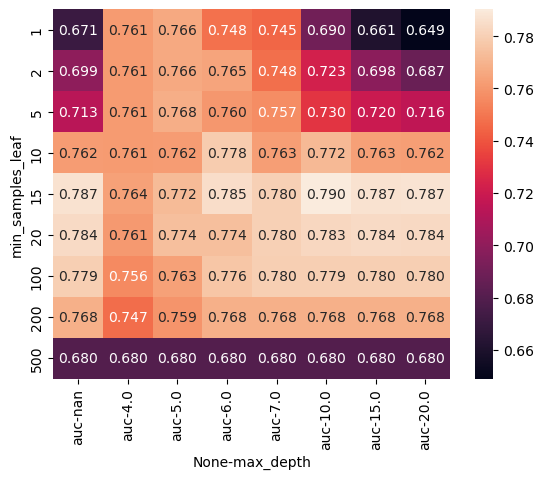

In [260]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

In [261]:
# Could be sub-optimal.. max depth of others could also be better.
# can try for this dataset. 

In [262]:
# Final DT

dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

# 6.6  Random Forest

In [264]:
from sklearn.ensemble import RandomForestClassifier

In [267]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [269]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.7744726453706618)

In [274]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    score = roc_auc_score(y_val, y_pred)

    scores.append((n, score))
    

In [275]:
scores

[(10, np.float64(0.7744726453706618)),
 (20, np.float64(0.8035316412777603)),
 (30, np.float64(0.8150747136179797)),
 (40, np.float64(0.8156862270228379)),
 (50, np.float64(0.8170818095953114)),
 (60, np.float64(0.8164581870141193)),
 (70, np.float64(0.8173209658279045)),
 (80, np.float64(0.8163068223099464)),
 (90, np.float64(0.8168244895982175)),
 (100, np.float64(0.8175994768835824)),
 (110, np.float64(0.8175268218255793)),
 (120, np.float64(0.8179385338209295)),
 (130, np.float64(0.8182533724056089)),
 (140, np.float64(0.818102007701436)),
 (150, np.float64(0.8172695018284857)),
 (160, np.float64(0.8179809159380979)),
 (170, np.float64(0.8176055314717492)),
 (180, np.float64(0.8174632486498269)),
 (190, np.float64(0.817980915938098)),
 (200, np.float64(0.8190495507495582))]

In [280]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
df_scores

,n_estimators,auc
0,10,0.774473
1,20,0.803532
2,30,0.815075
3,40,0.815686
4,50,0.817082
5,60,0.816458
6,70,0.817321
7,80,0.816307
8,90,0.816824
9,100,0.817599


In [281]:
from matplotlib import pyplot as plt

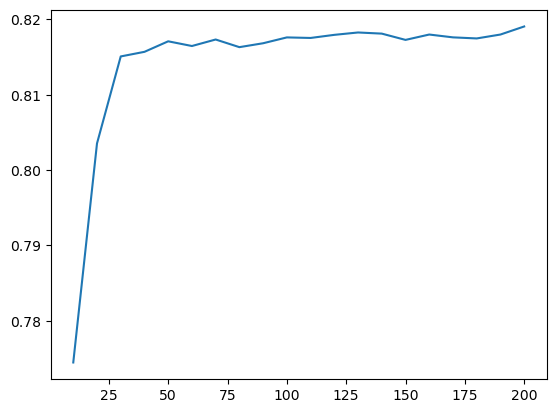

In [282]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [283]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict_proba(X_val)[:, 1]
        score = roc_auc_score(y_val, y_pred)
    
        scores.append((n, d, score))
        

In [286]:
columns = ['n_estimators', 'max_depth', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,n_estimators,max_depth,auc
0,10,5,0.787699
1,20,5,0.797731
2,30,5,0.800305
3,40,5,0.799708
4,50,5,0.799878


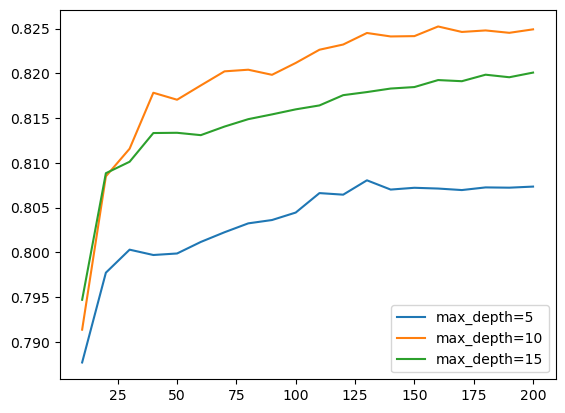

In [287]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label=f'max_depth={d}')

plt.legend()
    

In [288]:
# Best max_depth 
max_depth = 10

In [301]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1,
                                    n_jobs=-1
                                   )
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict_proba(X_val)[:, 1]
        score = roc_auc_score(y_val, y_pred)
    
        scores.append((n, s, score))

In [302]:
columns = ['n_estimators', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,n_estimators,min_samples_leaf,auc
0,10,1,0.791365
1,20,1,0.808496
2,30,1,0.811584
3,40,1,0.817839
4,50,1,0.817058


In [303]:
colors = ['black', 'blue', 'orange', 'red', 'gray']
min_samples_leaf_values = [1, 3, 5, 10, 50]
samples_itr = list(zip(min_samples_leaf_values, colors))

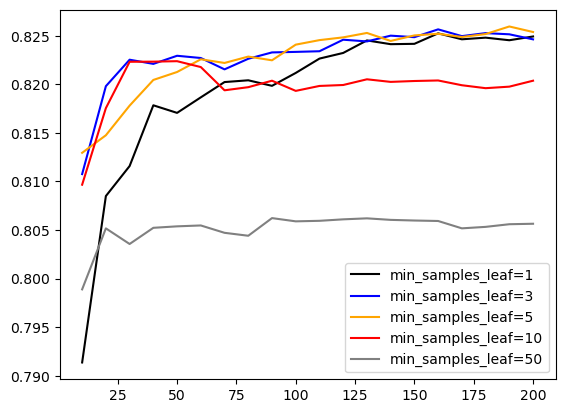

In [304]:
colors = ['black', 'blue', 'orange', 'red', 'gray']
for s, color in samples_itr:
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, label=f'min_samples_leaf={s}', color=color)

plt.legend()
    

In [305]:
# Best 
min_samples_leaf = 3

In [307]:
n

200

In [308]:
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, random_state=1)

In [309]:
# 6.7 Gradient Boosting


In [310]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.4 MB/s eta 0:00:008.0 MB/s eta 0:00:01


In [313]:
import xgboost as xgb

In [318]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(
    X_train,
    label=y_train,
    feature_names=features
)
dval = xgb.DMatrix(
    X_val,
    label=y_val,
    feature_names=features
)

In [327]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1
}
model = xgb.train(xgb_params, dtrain, num_boost_round=15)

In [328]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

np.float64(0.8126468237630476)

In [335]:
%%capture output
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',

    'seed': 1,
    'verbosity': 1
}
watchlist = [(dtrain, 'train'), (dval, 'val')]
model = xgb.train(
    xgb_params, dtrain,
    num_boost_round=200,
    verbose_eval=5,
    evals=watchlist
)

In [359]:
## Capture
s = output.stdout.strip()
print(s)

[0]	train-auc:0.86730	val-auc:0.77938
[5]	train-auc:0.93086	val-auc:0.80858
[10]	train-auc:0.95447	val-auc:0.80851
[15]	train-auc:0.96554	val-auc:0.81334
[20]	train-auc:0.97464	val-auc:0.81729
[25]	train-auc:0.97953	val-auc:0.81686
[30]	train-auc:0.98579	val-auc:0.81543
[35]	train-auc:0.99011	val-auc:0.81206
[40]	train-auc:0.99421	val-auc:0.80922
[45]	train-auc:0.99548	val-auc:0.80842
[50]	train-auc:0.99653	val-auc:0.80918
[55]	train-auc:0.99765	val-auc:0.81114
[60]	train-auc:0.99817	val-auc:0.81172
[65]	train-auc:0.99887	val-auc:0.80798
[70]	train-auc:0.99934	val-auc:0.80870
[75]	train-auc:0.99965	val-auc:0.80555
[80]	train-auc:0.99979	val-auc:0.80549
[85]	train-auc:0.99988	val-auc:0.80374
[90]	train-auc:0.99993	val-auc:0.80409
[95]	train-auc:0.99996	val-auc:0.80548
[100]	train-auc:0.99998	val-auc:0.80509
[105]	train-auc:0.99999	val-auc:0.80629
[110]	train-auc:1.00000	val-auc:0.80637
[115]	train-auc:1.00000	val-auc:0.80494
[120]	train-auc:1.00000	val-auc:0.80574
[125]	train-auc:1.0000

In [360]:
line = s.split('\n')[0]
line

'[0]\ttrain-auc:0.86730\tval-auc:0.77938'

In [361]:
index, train_auc, val_auc = line.split('\t')

In [362]:
index, train_auc, val_auc

('[0]', 'train-auc:0.86730', 'val-auc:0.77938')

In [363]:
int(index.strip('[]'))

0

In [364]:
float(train_auc.split(':')[1])

0.8673

In [365]:
float(val_auc.split(':')[1])

0.77938

In [511]:
def parse_xgb_output(output):
    s = output.stdout.strip()
    
    lines = s.split('\n')
    xgb_scores = []
    for line in lines:
        r_index, r_train_auc, r_val_auc = line.split('\t')
        index = int(r_index.strip('[]'))
        train_auc = float(r_train_auc.split(':')[1])
        val_auc = float(r_val_auc.split(':')[1])
        xgb_scores.append((index, train_auc, val_auc))

    xgb_df = pd.DataFrame(xgb_scores, columns=['iter', 'train_auc', 'val_auc'])
    return xgb_df

In [512]:
xgb_df = parse_xgb_output(output)

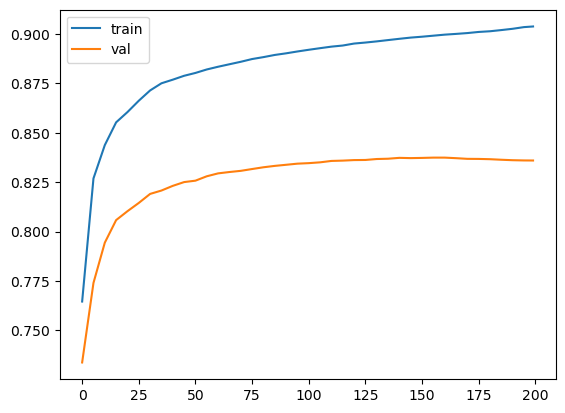

In [513]:
plt.plot(xgb_df.iter, xgb_df.train_auc, label='train')
plt.plot(xgb_df.iter, xgb_df.val_auc, label='val')
plt.legend()

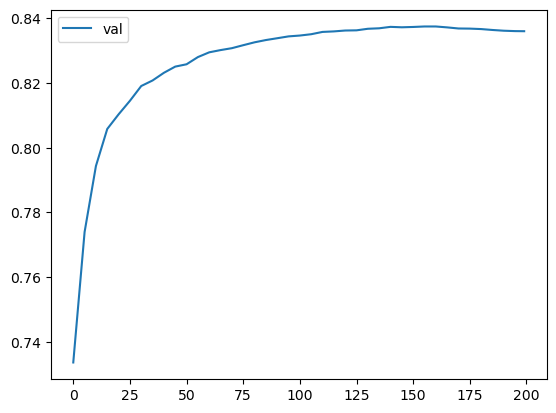

In [514]:
# plt.plot(xgb_df.index, xgb_df.train_auc, label='train')
plt.plot(xgb_df.iter, xgb_df.val_auc, label='val')
plt.legend()

In [515]:
# 6.8 XGBoost Parameter Tuning

In [516]:
# Tune ETA 

In [517]:
eta_scores = {}

In [529]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1, 

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                 verbose_eval=5,
                 evals=watchlist)

In [530]:
key = f"eta={xgb_params['eta']}"
eta_scores[key] = parse_xgb_output(output)
eta_scores.keys()

dict_keys(['eta=0.05', 'eta=0.01', 'eta=1.0', 'eta=0.1', 'eta=0.3'])

In [531]:
eta_scores['eta=0.1'].head()

,iter,train_auc,val_auc
0,0,0.86730,0.77938
1,5,0.90325,0.79290
2,10,0.91874,0.80510
3,15,0.93126,0.81380
4,20,0.93873,0.81804


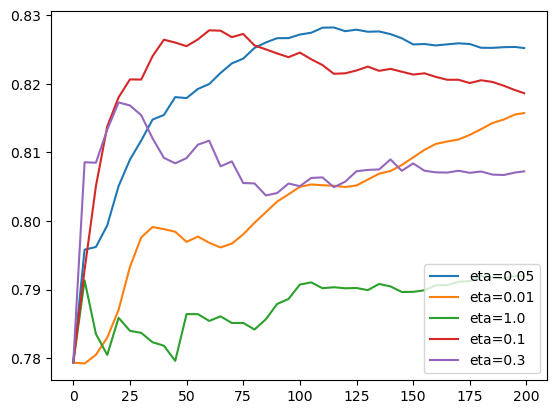

In [532]:
for key, sc_df in eta_scores.items():
    plt.plot(sc_df.iter, sc_df.val_auc, label=key)
plt.legend()
    

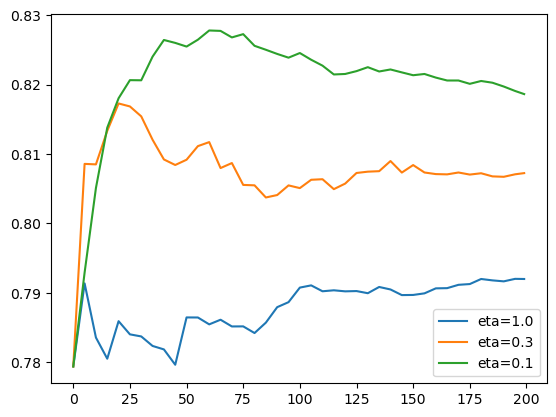

In [533]:
etas = ['eta=1.0', 'eta=0.3', 'eta=0.1']

for eta in etas:
    sc_df = eta_scores[eta]
    plt.plot(sc_df.iter, sc_df.val_auc, label=eta)
plt.legend()

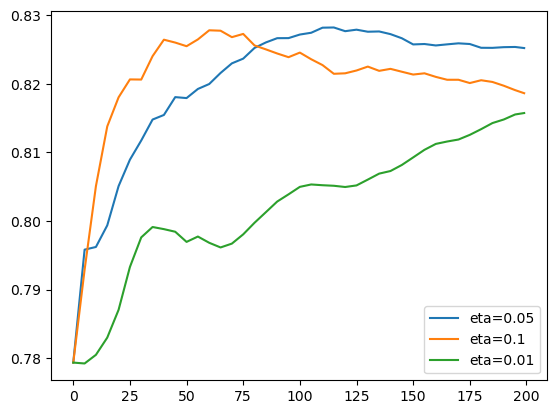

In [534]:
etas = ['eta=0.05', 'eta=0.1', 'eta=0.01']

for eta in etas:
    sc_df = eta_scores[eta]
    plt.plot(sc_df.iter, sc_df.val_auc, label=eta)
plt.legend()

In [535]:
# => eta .1 is the best.. starts with small increment, but gets better with the auc

Tune in this order
```

- ETA
- MAX_DEPTH
- MIN_CHILD_DEPTH
.. others

```

In [536]:
# Tune max_depth 

In [537]:
md_scores = {} # (repeat the 4 steps below for interested values)

In [545]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 1, 

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                 verbose_eval=5,
                 evals=watchlist)

In [546]:
key = f"max_depth={xgb_params['max_depth']}"
md_scores[key] = parse_xgb_output(output)
md_scores.keys()

dict_keys(['max_depth=3', 'max_depth=6', 'max_depth=10'])

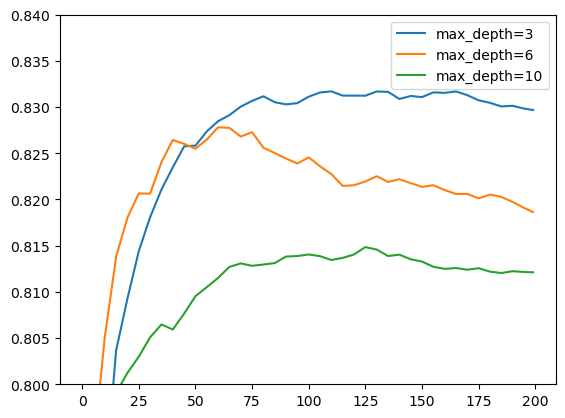

In [547]:
for key, sc_df in md_scores.items():
    plt.plot(sc_df.iter, sc_df.val_auc, label=key)

plt.ylim(0.8, 0.84)
plt.legend()

In [548]:
# max_depth = 3

In [549]:
mcw_scores = {}

In [555]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1, 

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                 verbose_eval=5,
                 evals=watchlist)

In [556]:
key = f"min_child_weight={xgb_params['min_child_weight']}"
mcw_scores[key] = parse_xgb_output(output)
mcw_scores.keys()

dict_keys(['min_child_weight=30', 'min_child_weight=10', 'min_child_weight=1'])

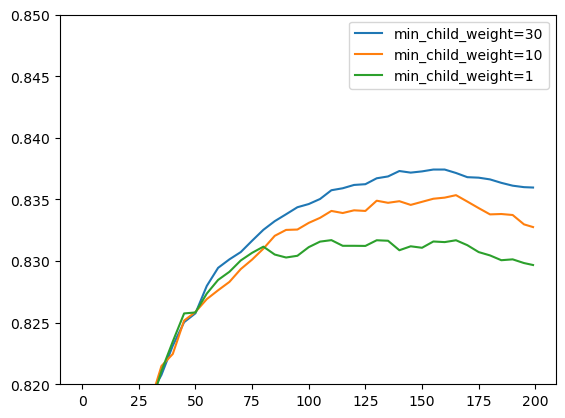

In [558]:
for mcw, df_score in mcw_scores.items():
    plt.plot(df_score.iter, df_score.val_auc, label=mcw)
    plt.ylim(0.82, 0.85)

plt.legend()

In [559]:
# min_child_weight = 30

In [560]:
# final model

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30, 

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=150)

# 6.9 Final Model

In [569]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [572]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

np.float64(0.7853194400716863)

In [565]:
rf = RandomForestClassifier(n_estimators=200,
                           max_depth=10,
                           min_samples_leaf=3,
                           random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [573]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

np.float64(0.8246258264512848)

In [575]:

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30, 

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=150)

In [577]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

np.float64(0.8373465161899687)

In [580]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,22,owner,48,48,married,no,fixed,60,110.0,3000.0,0.0,1000,1460
1,default,8,other,60,41,married,no,freelance,45,62.0,0.0,0.0,1800,2101
2,ok,2,parents,36,19,married,no,fixed,35,162.0,4000.0,100.0,400,570
3,ok,1,owner,12,61,married,no,others,45,103.0,20000.0,0.0,300,650
4,ok,13,owner,60,27,married,no,fixed,35,253.0,7000.0,0.0,1060,1750


In [582]:
y_full_train = (df_full_train.status == 'default').astype(int).values
y_full_train

array([0, 1, 0, ..., 0, 0, 1])

In [583]:
del df_full_train['status']

In [586]:

dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)


In [588]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=list(dv.get_feature_names_out()))
dtest = xgb.DMatrix(X_test, feature_names=list(dv.get_feature_names_out()))

In [589]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30, 

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=150)

In [590]:
y_pred = model.predict(dtest)

In [591]:
y_pred[:19]

array([0.31275234, 0.23936482, 0.07544855, 0.21313737, 0.3554667 ,
       0.23314953, 0.00719011, 0.01935961, 0.25677818, 0.28732377,
       0.1628378 , 0.13938665, 0.24684922, 0.32885137, 0.27526447,
       0.5926323 , 0.13414907, 0.6978078 , 0.12223131], dtype=float32)

In [592]:
roc_auc_score(y_test, y_pred)

np.float64(0.8323823371291725)

In [593]:
# Performance was most good.. we didn't overfit.